In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv("C:/Users/utkhare/Desktop/Documents/Onwards2015.csv")

C:\Users\utkhare\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


###  Goal

In [132]:
# Compare batsmen who bat in the last 5 overs 

### Inital DF for IPL 2015 - 2018

In [133]:
# First Comparison between 2015-2018  
df = df[(df.id >= 829705) & (df.id <= 1136620 )]
df = df[df.over >= 15]

In [134]:
# get all batsmen who bat consistently during > 15 overs

batsman_scores = pd.DataFrame ( df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(20) ).reset_index()
batsman_scores.head()

,batsman,batsman_runs
0,MS Dhoni,891
1,KA Pollard,548
2,YK Pathan,462
3,KD Karthik,448
4,HH Pandya,434


In [135]:
# Count of balls faced during death overs

batsman_balls = pd.DataFrame ( 
    df[df.over >= 15].groupby('batsman')['ball'].count().sort_values(ascending = False).head(40) ).reset_index()

# batsman_balls = batsman_balls[ball >= 100]
batsman_balls = batsman_balls[batsman_balls.ball >= 100]

batsman_balls.head()

,batsman,ball
0,MS Dhoni,535
1,KA Pollard,352
2,YK Pathan,303
3,HH Pandya,288
4,KD Karthik,281


In [136]:
# Number of innings during death overs

batsman_innings = pd.DataFrame ( 
    df[df.over >= 15].groupby('batsman')['id'].nunique().sort_values(ascending = False).head(50) ).reset_index()

batsman_innings.head()

,batsman,id
0,MS Dhoni,46
1,HH Pandya,36
2,KA Pollard,34
3,YK Pathan,32
4,RA Jadeja,32


In [137]:
batsman_final = batsman_scores.merge(batsman_balls, on = 'batsman', how = 'left')
batsman_final = batsman_final.merge(batsman_innings, on = 'batsman', how = 'left')

batsman_final['strike_rate'] = 100 * batsman_final['batsman_runs'] / batsman_final['ball']
batsman_final['rpi'] = batsman_final['batsman_runs'] / batsman_final['id']

In [138]:
batsman_final.head()

,batsman,batsman_runs,ball,id,strike_rate,rpi
0,MS Dhoni,891,535,46,166.542056,19.369565
1,KA Pollard,548,352,34,155.681818,16.117647
2,YK Pathan,462,303,32,152.475248,14.437500
3,KD Karthik,448,281,29,159.430605,15.448276
4,HH Pandya,434,288,36,150.694444,12.055556


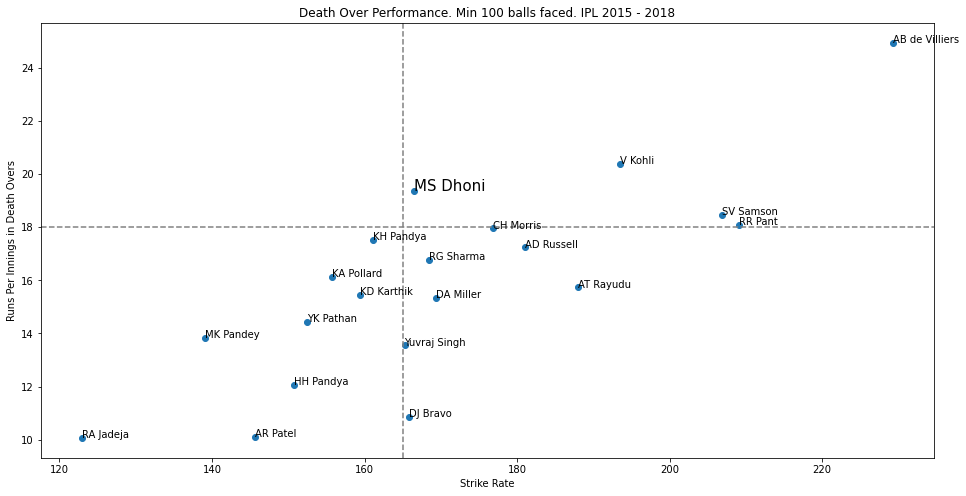

In [139]:
plt.figure(figsize = (16,8))
plt.scatter(batsman_final.strike_rate, batsman_final.rpi)

for i in range(len(batsman_final)): 
    if (batsman_final['batsman'][i] == 'MS Dhoni'): 
        plt.text(batsman_final['strike_rate'][i], batsman_final['rpi'][i], batsman_final['batsman'][i], fontsize = 15)
    else: 
        plt.text(batsman_final['strike_rate'][i], batsman_final['rpi'][i], batsman_final['batsman'][i])
    
plt.axvline(165 , ls = '--', color = 'grey')
plt.axhline(18 , ls = '--', color = 'grey')
plt.title("Death Over Performance. Min 100 balls faced. IPL 2015 - 2018")
plt.xlabel("Strike Rate")
plt.ylabel("Runs Per Innings in Death Overs")
plt.show()

### Initial DF for IPL 2019 - 2020

In [140]:
# Compare batsmen who bat in the last 5 overs 
# Second Comparison between 2019 - 2020
new_df = pd.read_csv("C:/Users/utkhare/Desktop/Documents/Onwards2015.csv")
new_df = new_df[(new_df.id >= 1175356) & (new_df.id <= 1237181 )]
new_df = new_df[new_df.over >= 15]

C:\Users\utkhare\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [141]:
# get all batsmen who bat consistently during > 15 overs

batsman_scores = pd.DataFrame ( new_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(20) ).reset_index()
batsman_scores.head()

,batsman,batsman_runs
0,HH Pandya,516
1,KA Pollard,406
2,AB de Villiers,404
3,MS Dhoni,396
4,AD Russell,368


In [142]:
# Count of balls faced during death overs

batsman_balls = pd.DataFrame ( 
    new_df[new_df.over >= 15].groupby('batsman')['ball'].count().sort_values(ascending = False).head(40) ).reset_index()

# Since we used 100 balls as benchmark for 4 years during IPL 2015-2018 calculation
# using 50 balls as benchmark here for IPL 2019-2020
# batsman_balls = batsman_balls[ball >= 50]
batsman_balls = batsman_balls[batsman_balls.ball >= 50]

batsman_balls.head()

,batsman,ball
0,HH Pandya,277
1,MS Dhoni,255
2,KA Pollard,211
3,AB de Villiers,176
4,MP Stoinis,175


In [143]:
# Number of innings during death overs

batsman_innings = pd.DataFrame ( 
    new_df[new_df.over >= 15].groupby('batsman')['id'].nunique().sort_values(ascending = False).head(50) ).reset_index()

batsman_innings.head()

,batsman,id
0,HH Pandya,25
1,MP Stoinis,20
2,KA Pollard,20
3,MS Dhoni,20
4,RR Pant,19


In [144]:
batsman_final = batsman_scores.merge(batsman_balls, on = 'batsman', how = 'left')
batsman_final = batsman_final.merge(batsman_innings, on = 'batsman', how = 'left')

batsman_final['strike_rate'] = 100 * batsman_final['batsman_runs'] / batsman_final['ball']
batsman_final['rpi'] = batsman_final['batsman_runs'] / batsman_final['id']

In [145]:
batsman_final.head()

,batsman,batsman_runs,ball,id,strike_rate,rpi
0,HH Pandya,516,277,25,186.281588,20.640000
1,KA Pollard,406,211,20,192.417062,20.300000
2,AB de Villiers,404,176,15,229.545455,26.933333
3,MS Dhoni,396,255,20,155.294118,19.800000
4,AD Russell,368,162,14,227.160494,26.285714


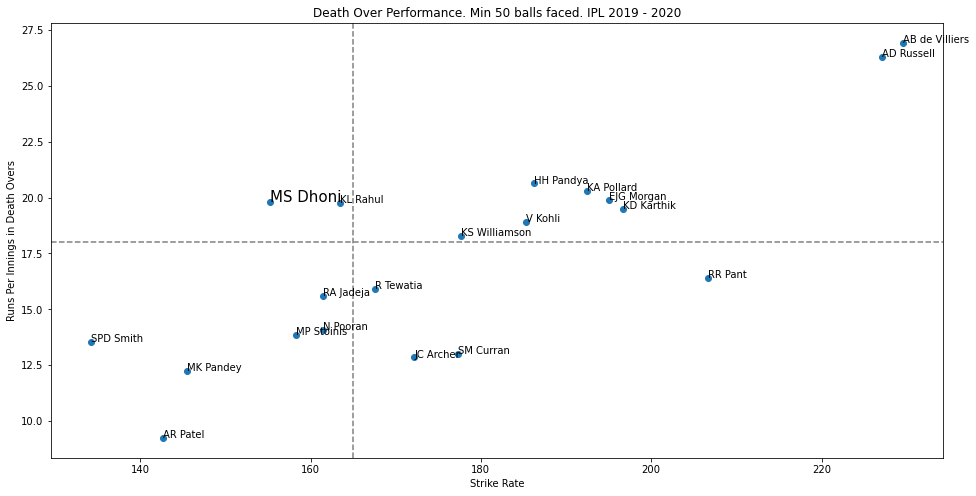

In [146]:
plt.figure(figsize = (16,8))
plt.scatter(batsman_final.strike_rate, batsman_final.rpi)

for i in range(len(batsman_final)): 
    if (batsman_final['batsman'][i] == 'MS Dhoni'): 
        plt.text(batsman_final['strike_rate'][i], batsman_final['rpi'][i], batsman_final['batsman'][i], fontsize = 15)
    else: 
        plt.text(batsman_final['strike_rate'][i], batsman_final['rpi'][i], batsman_final['batsman'][i])
    
plt.axvline(165 , ls = '--', color = 'grey')
plt.axhline(18 , ls = '--', color = 'grey')
plt.title("Death Over Performance. Min 50 balls faced. IPL 2019 - 2020")
plt.xlabel("Strike Rate")
plt.ylabel("Runs Per Innings in Death Overs")
plt.show()

### Conclusion

In [129]:
# While the number of runs scored by MS continues to be among the best, 
# his SR has dropped considerably in the last 2 years to be considered a finisher. 
# he still hasn't gone down to the bottom left quadrant though